In [103]:
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from scipy import stats
import umap

import anndata as ad
import scanpy as sc
import squidpy as sq
import seaborn as sns
import h5py
from matplotlib_scalebar.scalebar import ScaleBar
from tqdm import tqdm

# mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# # Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')

In [116]:
#Define the path where the files are located
DATA_PATH=('/mnt/ibm_lg/leah.dorman/Nanostring/Data/IBD_Michael_Kattah/')
data_files = os.listdir(os.path.join(DATA_PATH,'annotated_data'))
data_files


['full_dataset_with_celltypes.h5ad',
 'renormalized_10-11-2022.h5ad',
 'KNFC5VYF',
 'umap.h5ad',
 '22_10_4_CosMx_umap_V5.h5ad']

In [117]:
datafile = data_files[1]
ndata = sc.read_h5ad(os.path.join(DATA_PATH,'annotated_data',datafile))
print(ndata)
metadata = ndata.obs

AnnData object with n_obs × n_vars = 64699 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc', 'pct_counts_ercc', 'n_genes', 'Endoscopic_severity', 'R_vs_L', 'leiden_v10_r1.6', 'Patient_samples', 'leiden_v8_r1.6', 'fine_annotation', 'Coarse_annotation', 'leiden_v9_r0.4', 'Condition'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ercc', 'n_cells', 'mean', 'std'
    uns: 'Coarse_annotation_colors', 'fov_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_spatial', 'X_spatial_global', 'X_umap', 'spatial', 'spatial_fov'
    varm: 'PCs'
    layers: 'log_normalized_counts', 'raw_counts', 'scale_data'
    obsp: 'connectivitie

In [118]:
metadata.Condition.value_counts()

VDZ    18903
HC     16767
UC     13113
Name: Condition, dtype: int64

In [119]:
#Define the path where the files are located
DATA_PATH=('/mnt/ibm_lg/leah.dorman/Nanostring/Data/IBD_Michael_Kattah/')
data_files = os.listdir(os.path.join(DATA_PATH,'processed_data'))
ndata = sc.read_h5ad(os.path.join(DATA_PATH,'processed_data',data_files[2]))
print(data_files[2])

nanostring_IBD_normalized_umap_093022.h5ad


In [120]:
ndata.obs.columns

Index(['fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px',
       'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain',
       'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3',
       'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', 'n_genes'],
      dtype='object')

/tmp/ipykernel_3898665/160459518.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ndata.obs.loc[metadata.index,column]=metadata[column]
/tmp/ipykernel_3898665/160459518.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ndata.obs.loc[metadata.index,column]=metadata[column]
/tmp/ipykernel_3898665/160459518.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique,

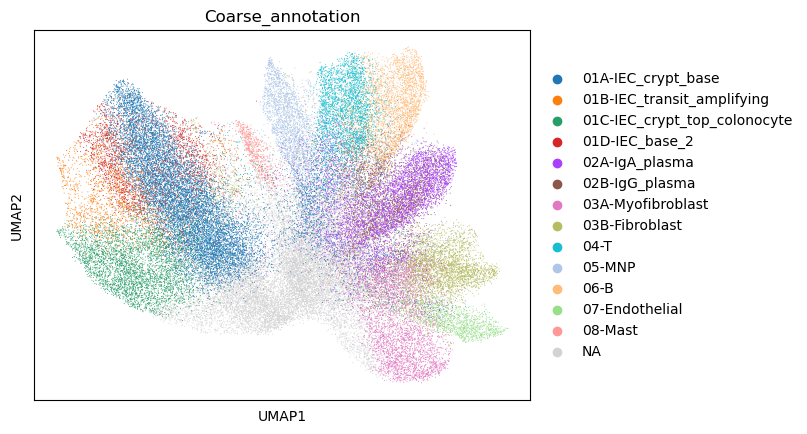

In [121]:
for column in list(metadata.columns):
    if column in list(ndata.obs.columns):
        continue
    else:
        ndata.obs.loc[metadata.index,column]=metadata[column]
sc.pl.umap(ndata,color='Coarse_annotation')

In [123]:
ndata = ndata[~ndata.obs.Coarse_annotation.isin(['10-low_gene_count','09-nonspecific'])].copy()

/home/leah.dorman/anaconda3/envs/anno/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


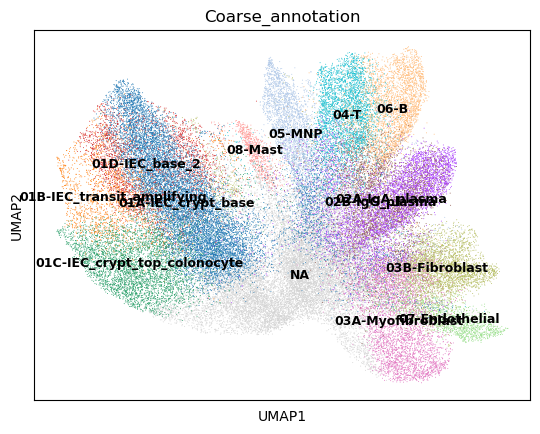

In [124]:
sc.pl.umap(ndata,color='Coarse_annotation',legend_loc='on data',legend_fontsize=9)

Re-normalize and calculate a new umap plot

In [125]:
print(ndata.X[0:20,0:5])
print(ndata.layers['raw_counts'][0:20,0:5])

In [126]:
ndata.layers['log_normalized_counts']=ndata.layers['raw_counts']
sc.pp.normalize_total(ndata, target_sum=1e4, layer='log_normalized_counts')
sc.pp.log1p(ndata,layer='log_normalized_counts')
print(ndata.layers['log_normalized_counts'][0:20,0:5])


In [127]:
ndata.X=ndata.layers['log_normalized_counts']

In [128]:
#Scale ndata.X and set a new layer that saves the scaled counts
sc.pp.scale(ndata, max_value=10)
ndata.layers['scale_data']=ndata.X

In [129]:
#make sure that the normalized counts aren't zero centered so there are no negative values. Scale_data should have negatives. 
print(min(ndata.layers['log_normalized_counts'].toarray().flatten()), min(ndata.layers['scale_data'].flatten()))

0.0 -3.714123


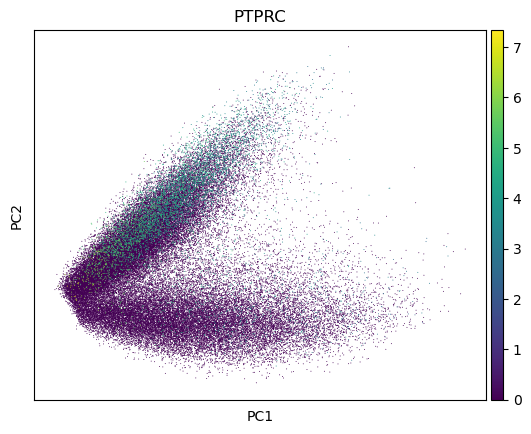

In [130]:
sc.tl.pca(ndata, svd_solver='arpack')
sc.pl.pca(ndata, color='PTPRC')

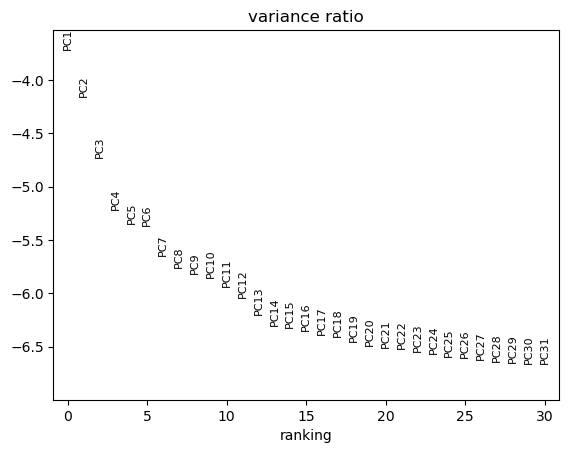

In [131]:
sc.pl.pca_variance_ratio(ndata, log=True)

In [132]:
sc.pp.neighbors(ndata, n_neighbors=10, n_pcs=30)

In [133]:
sc.tl.umap(ndata)

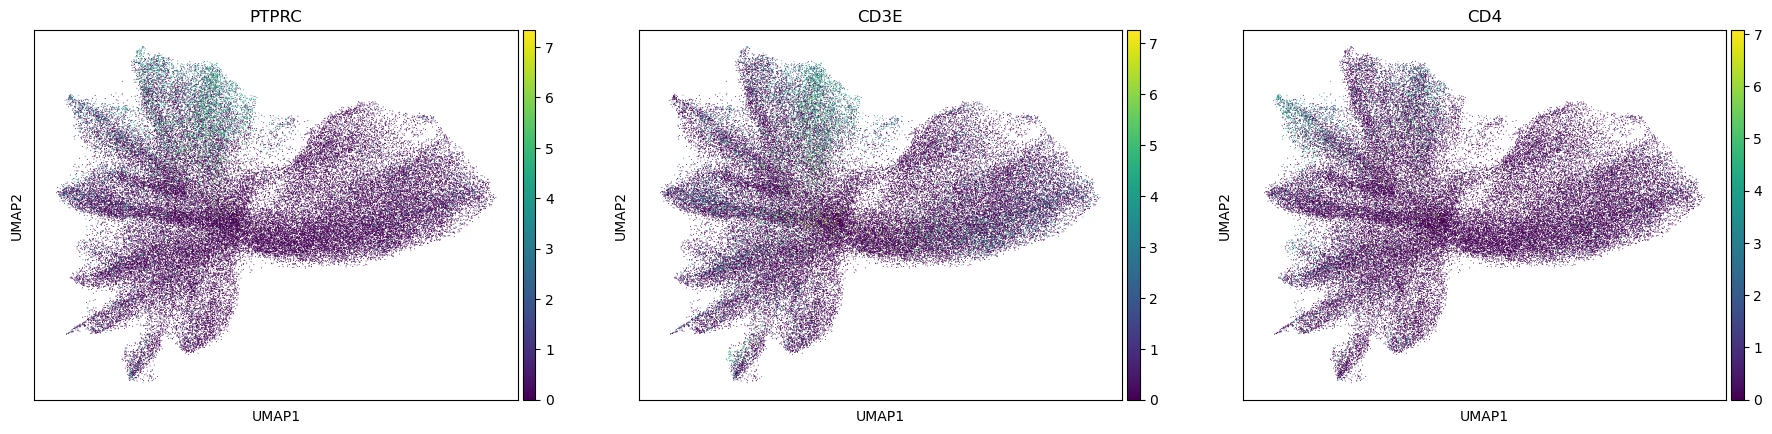

In [134]:
sc.pl.umap(ndata, color=['PTPRC', 'CD3E', 'CD4'])

In [135]:
#replace ndata.X so that the file is more readable in excellxgene
ndata.X=ndata.layers['log_normalized_counts']

VDZ    18903
HC     16767
UC     13113
Name: Condition, dtype: int64


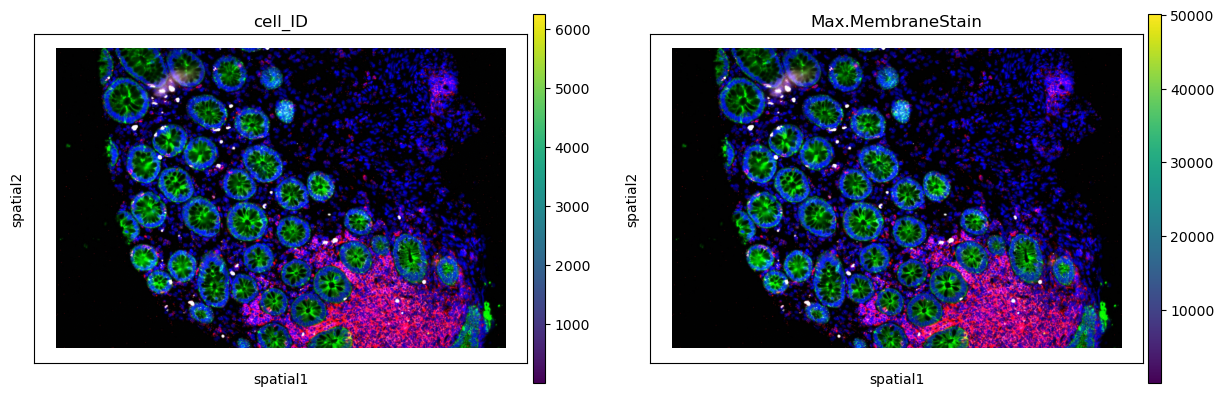

In [139]:
print(ndata.obs.Condition.value_counts())
sc.pl.spatial(ndata, color=["cell_ID","Max.MembraneStain"], 
              library_id="1") # 1st field of view

In [140]:
ndata.obs.columns

Index(['fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px',
       'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain',
       'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3',
       'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', 'n_genes', 'Endoscopic_severity', 'R_vs_L',
       'leiden_v10_r1.6', 'Patient_samples', 'leiden_v8_r1.6',
       'fine_annotation', 'Coarse_annotation', 'leiden_v9_r0.4', 'Condition'],
      dtype='object')

In [141]:
ndata.write_h5ad(os.path.join(DATA_PATH,'annotated_data','renormalized_10-11-2022.h5ad'))

Check marker gene expression

In [26]:
marker_genes = {
    'CD4_T_Cell':['CD3D', 'CD40LG', 'IL7R'],
    'B_Cell':['CD52','CD37','MS4A1'],
    'mDendritic_Cell':['CLEC7A','CLEC10A'],
    'Endothelial':['KDR','RAMP3','VWF','PECAM1'],
    'Fibroblast':['MYH11','ACTA2','ACTG2'],
    'CD8_T_Cell':['KLRK1','CCL5'],
    'Crypt_TA_Cell':['SPINK1','AGR2','OLFM4'],
    'Macrophage':['C1QC','GPNMB','C1QB'],
    'Monocyte':['ITGAX','FGR','S100A8'],
    'Epithelial':['CEACAM6','KRT19','KRT20','CEACAM1','EPCAM','PIGR','KRT8'],
    'Treg':['CTLA4','FOXP3'],
    'NK_CD8_Cell':['GZMA','ITGAE','GZMH'],
    'Inflammatory_Macrophage':['MMP9','PTGDS','CCL18'],
    'Plasma_Cell':['IRF4','JCHAIN','MZB1'],
    'Mast_Cell':['TPSB2','TPSAB1','CPA3'],
    'ILC3':['KIT'], #,'RORC'
    'Enteric_Neurons':['CRYAB','S100B','NRXN1'], #'PLP1'
}


CD4_T_Cell


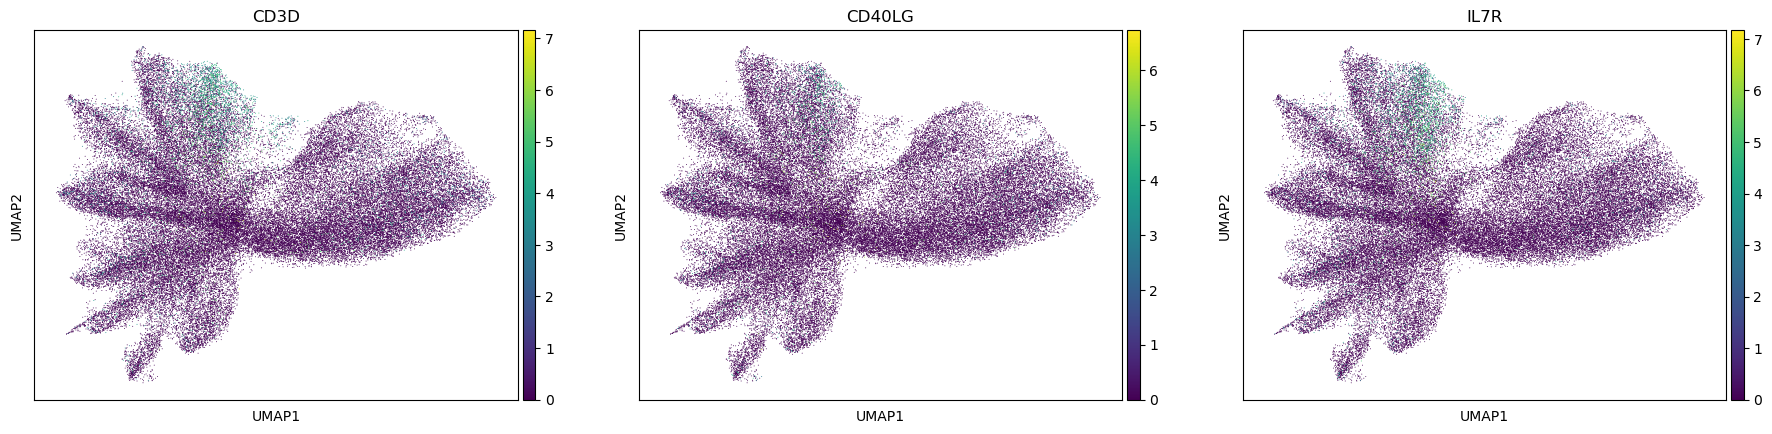

B_Cell


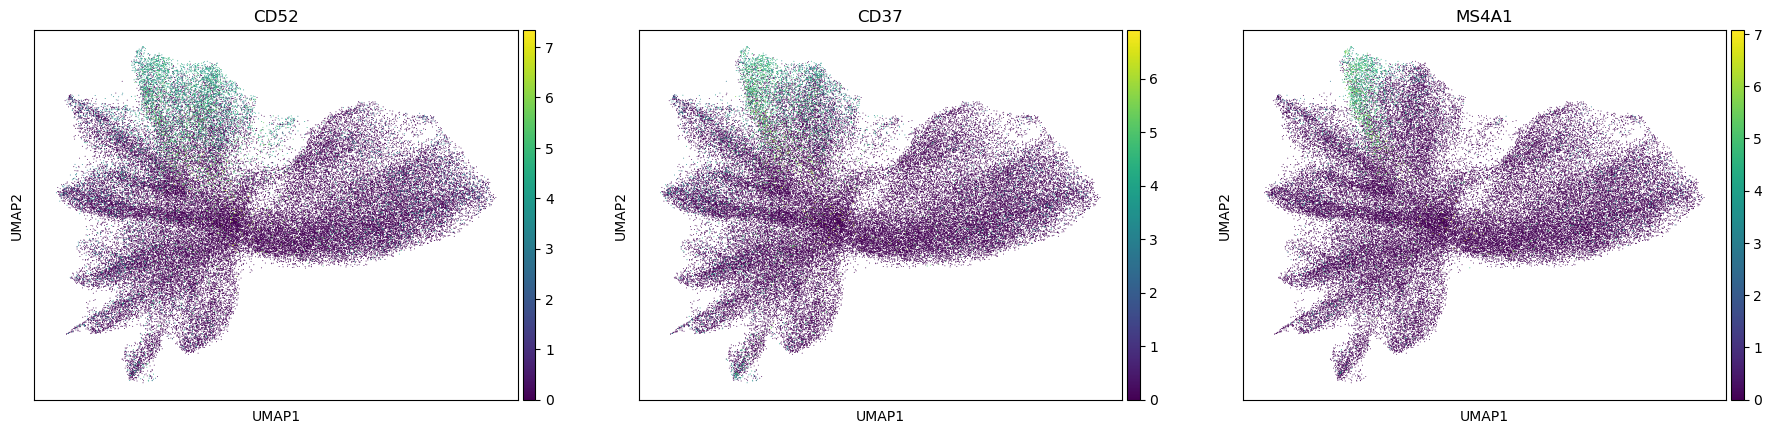

mDendritic_Cell


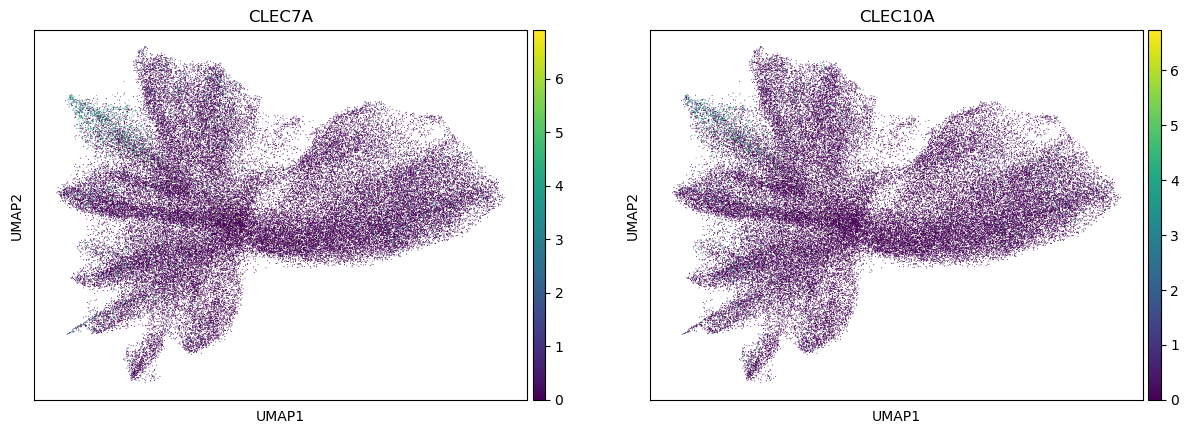

Endothelial


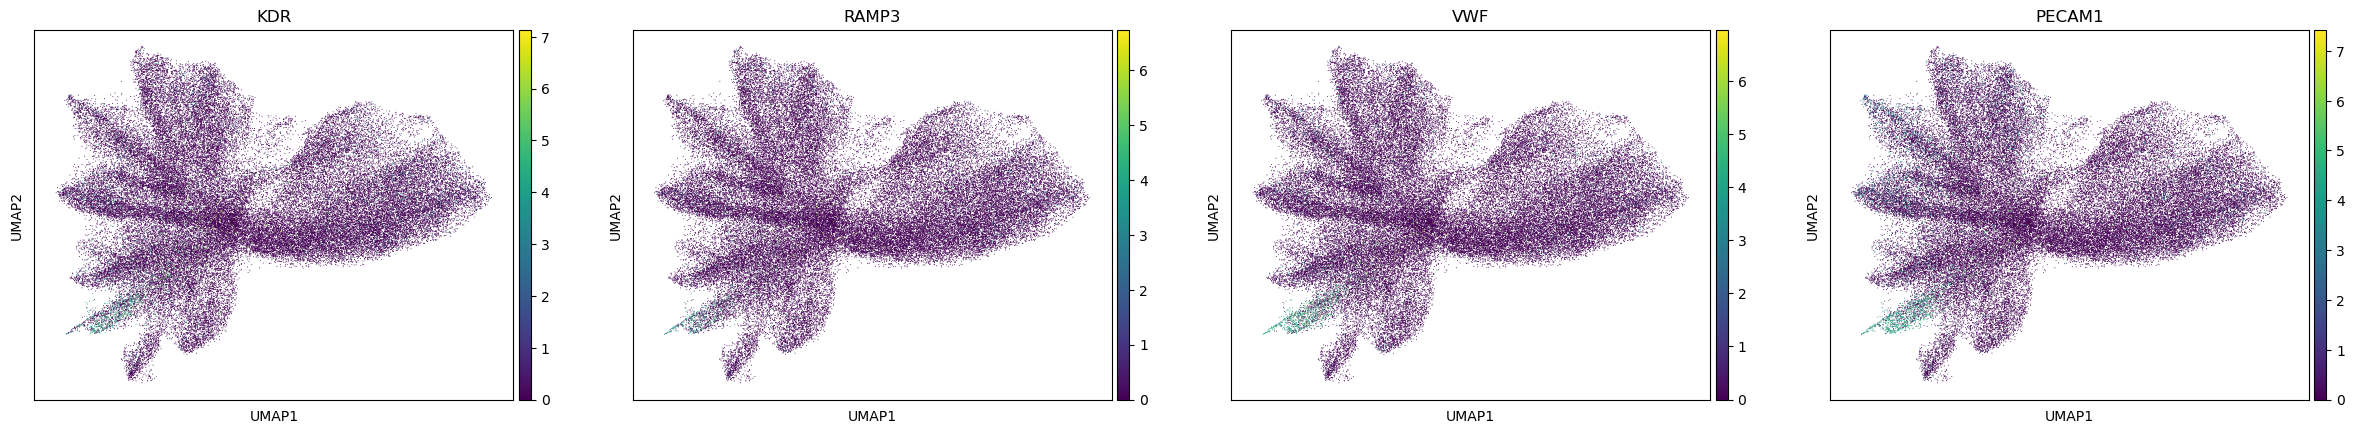

Fibroblast


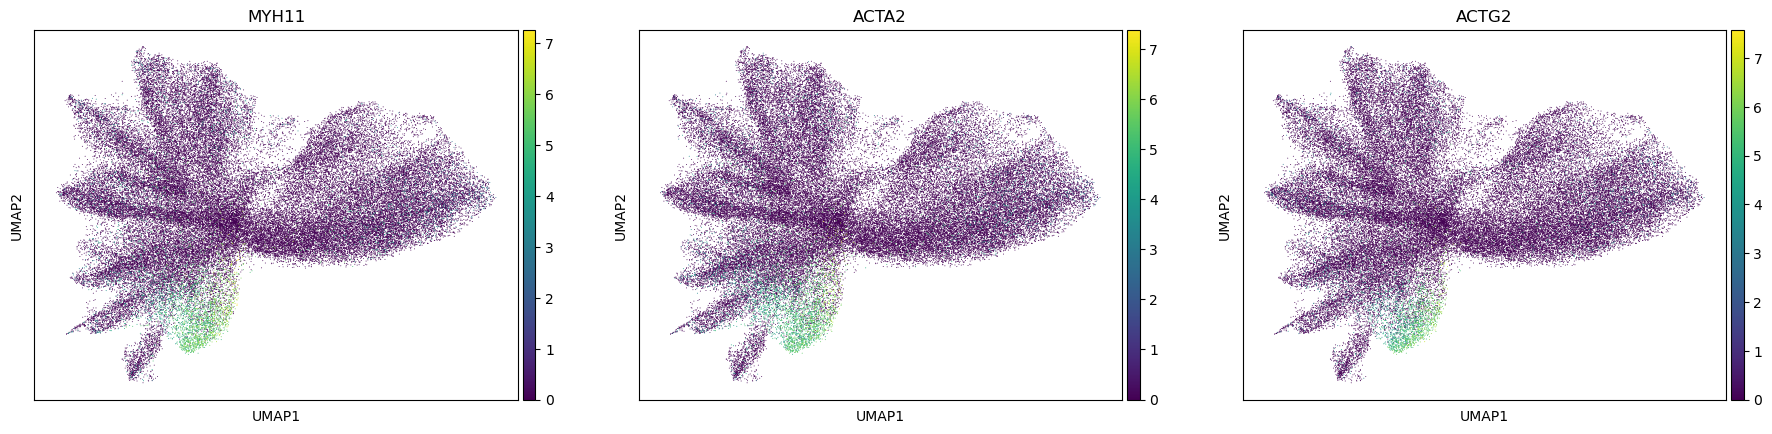

CD8_T_Cell


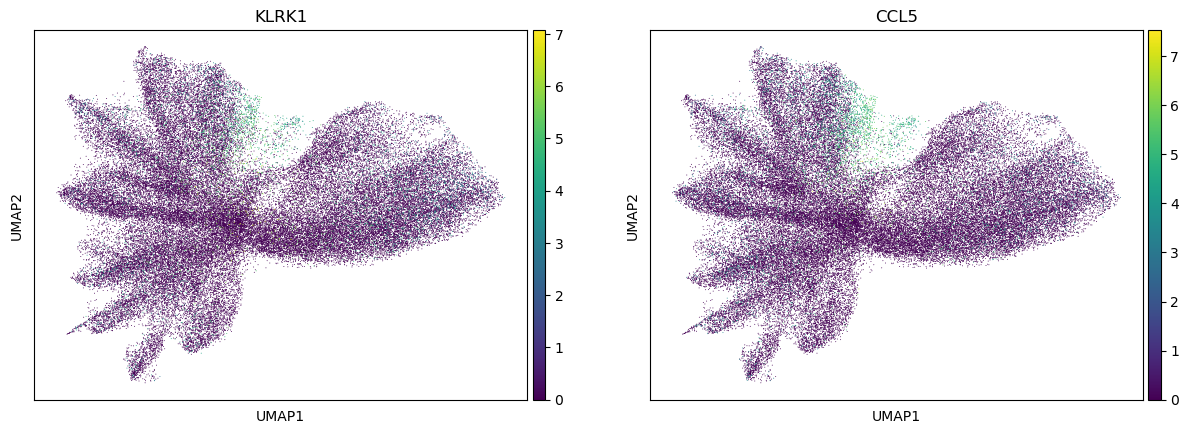

Crypt_TA_Cell


In [ ]:
for celltype in marker_genes.keys():
    print(celltype)
    sc.pl.umap(ndata,color=marker_genes[celltype])

In [ ]:
sc.pl.umap(ndata,color='Coarse_annotation',legend_loc='on data',legend_fontsize=8)
sc.pl.umap(ndata,color='fine_annotation',legend_loc='right margin',legend_fontsize=10)

In [142]:
ndata.obs.fine_annotation.value_counts()

01A-IEC_crypt_base              12231
02A-IgA_plasma                   4923
01C-IEC_crypt_top_colonocyte     4206
02B-IgG_plasma                   4067
03A-Myofibroblast                3671
06-B                             3150
05-MNP                           2594
03B-Fibroblast                   2444
01D-IEC_base_2                   2350
04A-CD4_T                        1875
01B-IEC_transit_amplifying       1814
07-Endothelial                   1515
04B-CD8_T                        1053
03C-activated_fibroblast          910
08-Mast                           701
05B-MNP_activated_inf             684
04C-Treg                          595
Name: fine_annotation, dtype: int64

In [ ]:
ndata.write('/mnt/ibm_lg/leah.dorman/Nanostring/Data/IBD_Michael_Kattah/annotated_data/full_dataset_with_celltypes.h5ad')

In [ ]:
ndata1 = ndata[ndata.obs.fov=='1'].copy()
ndata1

In [ ]:
# Check if the raw staining images are also loaded - This needs to be explored further to see what we'd like to visualize)
sc.pl.spatial(ndata1, color=["cell_ID","Max.MembraneStain","NegPrb21"],
              vmax=[5000,2000,2], vmin=[1, 1000, 0],
              alpha_img=0, library_id='1',spot_size=50) # 1st field of view

sc.pl.spatial(ndata1, color=['fine_annotation'],groups = ['03A-Myofibroblast','03B-Fibroblast','01A-IEC_crypt_base','05-MNP','03C-activated_fibroblast','05B-MNP_activated_inf'],
              alpha_img=0, library_id="1", spot_size=50) # 1st field of view

sc.pl.spatial(ndata1, color=['fine_annotation'],groups = ['03A-Myofibroblast','03B-Fibroblast','01A-IEC_crypt_base','05-MNP','03C-activated_fibroblast','05B-MNP_activated_inf'],
              alpha_img=1, library_id="1", spot_size=50) # 1st field of view

In [304]:
#make a table comparing condition and celltype
tab = ndata.obs.groupby(['Condition', 'fine_annotation']).size()
x = tab.unstack().transpose()
fibro=x.loc[['03B-Fibroblast','03C-activated_fibroblast','03A-Myofibroblast']]
macro=x.loc[['05-MNP','05B-MNP_activated_inf']]


#calculate totals per condition and per celltype
total_per_condition = fibro.sum(axis=0)
fibro = pd.concat([fibro, total_per_condition.to_frame().T], ignore_index=False)

total_per_celltype = fibro.sum(axis=1)
fibro['total_per_celltype']=total_per_celltype

#calculate totals per condition and per celltype
total_per_condition = macro.sum(axis=0)
macro = pd.concat([macro, total_per_condition.to_frame().T], ignore_index=False)

total_per_celltype = macro.sum(axis=1)
macro['total_per_celltype']=total_per_celltype

print("fibroblasts",'\n',fibro)
print("macrophages",'\n',macro)

fibroblasts 
 Condition                   HC    UC   VDZ  total_per_celltype
03B-Fibroblast             552   685  1207                2444
03C-activated_fibroblast   186   265   459                 910
03A-Myofibroblast         1084  1244  1343                3671
0                         1822  2194  3009                7025
macrophages 
 Condition                HC   UC   VDZ  total_per_celltype
05-MNP                  948  711   935                2594
05B-MNP_activated_inf   217  240   227                 684
0                      1165  951  1162                3278


In [305]:
print("macrophages",'\n',macro/macro.loc[0]*100)
print("fibroblasts",'\n',fibro/fibro.loc[0]*100)

macrophages 
 Condition                      HC          UC         VDZ  total_per_celltype
05-MNP                  81.373391   74.763407   80.464716           79.133618
05B-MNP_activated_inf   18.626609   25.236593   19.535284           20.866382
0                      100.000000  100.000000  100.000000          100.000000
fibroblasts 
 Condition                         HC          UC         VDZ  \
03B-Fibroblast             30.296378   31.221513   40.112994   
03C-activated_fibroblast   10.208562   12.078396   15.254237   
03A-Myofibroblast          59.495060   56.700091   44.632768   
0                         100.000000  100.000000  100.000000   

Condition                 total_per_celltype  
03B-Fibroblast                     34.790036  
03C-activated_fibroblast           12.953737  
03A-Myofibroblast                  52.256228  
0                                 100.000000  


In [15]:
ndata.var['mt'] = ndata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(ndata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

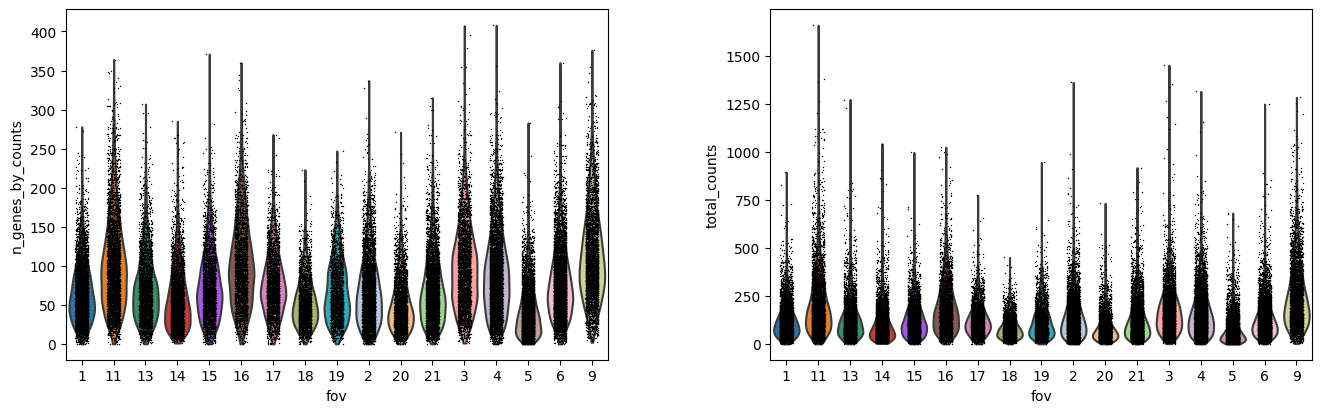

In [16]:
#show distribution of genes detected by field of view
sc.pl.violin(ndata, ['n_genes_by_counts', 'total_counts'], groupby='fov',
             jitter=0.2, multi_panel=True)

(array([2.0070e+03, 9.1990e+03, 1.2800e+04, 1.2480e+04, 1.0302e+04,
        7.3900e+03, 4.8510e+03, 2.9650e+03, 1.6910e+03, 9.8600e+02,
        5.7800e+02, 3.5200e+02, 2.0800e+02, 1.5200e+02, 1.0500e+02,
        7.0000e+01, 7.8000e+01, 2.9000e+01, 2.4000e+01, 2.5000e+01,
        1.7000e+01, 1.4000e+01, 1.6000e+01, 4.0000e+00, 2.0000e+00,
        3.0000e+00, 6.0000e+00, 4.0000e+00, 2.0000e+00, 2.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  147.  ,   623.62,  1100.24,  1576.86,  2053.48,  2530.1 ,
         3006.72,  3483.34,  3959.96,  4436.58,  4913.2 ,  5389.82,
         5866.44,  6343.06,  6819.68,  7296.3 ,  7772.92,  8249.54,
         8726.16,  9202.78,  9679.4 , 10156.02, 10632.64, 11109.26,
        11585.88, 12062.5 , 12539.12, 13015.74

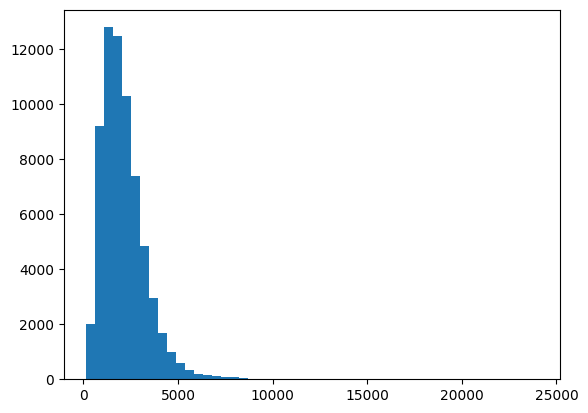

In [17]:
# check the distribution of the cell area
plt.hist(ndata.obs['Area'], bins=50)

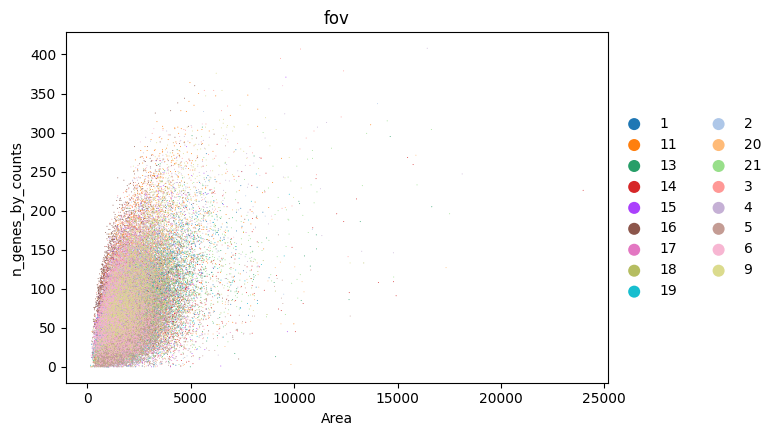

In [18]:
#show correlation between cell size and number of genes detected
sc.pl.scatter(ndata, x='Area', y='n_genes_by_counts',color='fov')

/home/leah.dorman/anaconda3/envs/anno/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
/home/leah.dorman/anaconda3/envs/anno/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


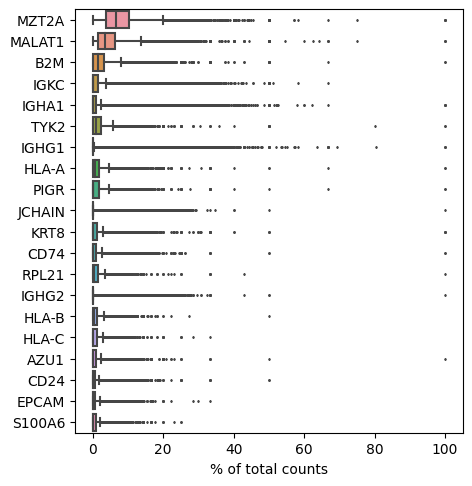

In [19]:
#highest expressed genes
sc.pl.highest_expr_genes(ndata, n_top=20)

#add umap, then save normalized (not scaled) 

#add log normalized counts to adata.raw
#adata.raw = adata (after normalization) because sc defaults to use .raw for DE

#look at how noisy marker gene expression is

#save fov images + h5ad 

In [20]:
ndata.layers['raw_counts']=ndata.X

In [21]:
sc.pp.filter_cells(ndata, min_genes=10)
sc.pp.filter_genes(ndata, min_cells=1)

In [22]:
ndata.var['mt'] = ndata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mtadata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'

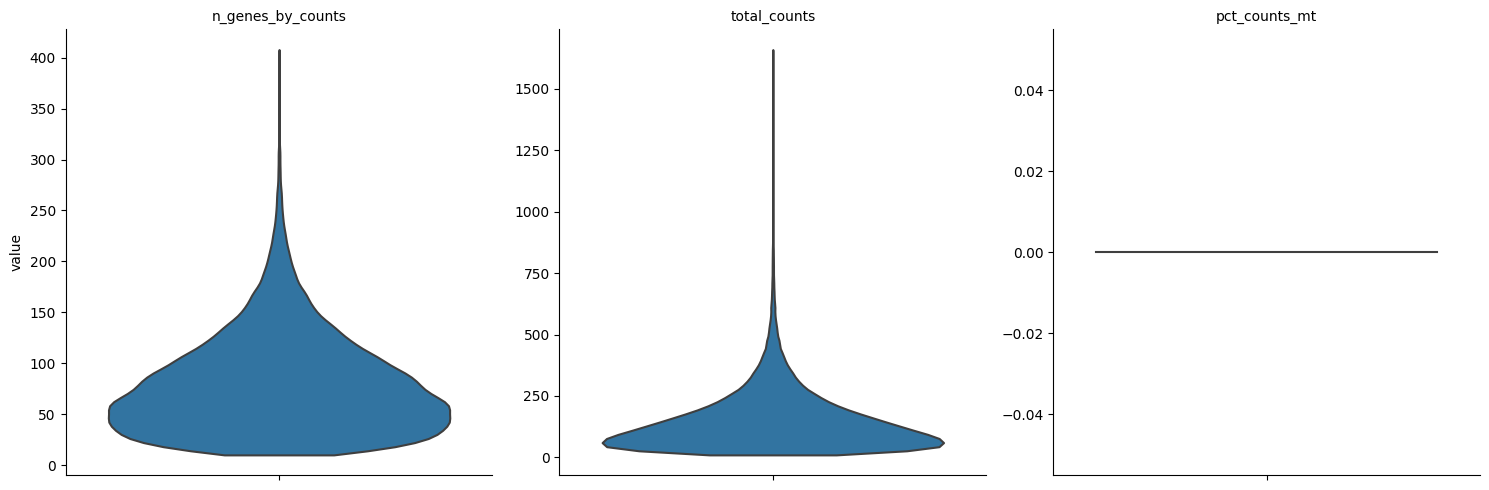

In [23]:
sc.pp.calculate_qc_metrics(ndata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(ndata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, stripplot=False, multi_panel=True)

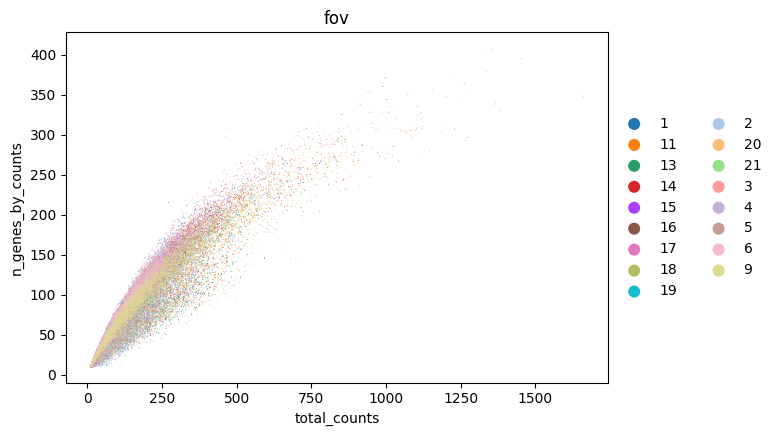

In [24]:

sc.pl.scatter(ndata, x='total_counts', y='n_genes_by_counts',color='fov')

Show expression of cell type specific marker genes within the UMAP plot for all fields of view

In [35]:
ndata

AnnData object with n_obs × n_vars = 64699 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.CD45', 'Max.CD45', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'spatial', 'fov_colors', 'log1p', 'pca', 'neighbors', 'umap'
    obsm: 'spatial', 'spatial_fov', 'X_spatial', 'X_spatial_global', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts', 'log_normalized_counts'
    obsp: 'distances', 'connectivities'

In [37]:
print(ndata.obs.fov)
filename = 'nanostring_IBD_normalized_umap_093022.h5ad'

1_1         1
2_1         1
3_1         1
4_1         1
5_1         1
           ..
5160_21    21
5161_21    21
5162_21    21
5163_21    21
5165_21    21
Name: fov, Length: 64699, dtype: category
Categories (17, object): ['1', '11', '13', '14', ..., '4', '5', '6', '9']


In [38]:
ndata.write_h5ad(os.path.join(DATA_PATH,'processed_data',filename))